In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

dataset = pd.read_csv(r'D:\VS Code\Machine Learning\Regression Models\Multiple Linear Regression\House Data\house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
dataset.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [3]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
dataset = dataset.drop(['id','date'], axis = 1)

In [5]:
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


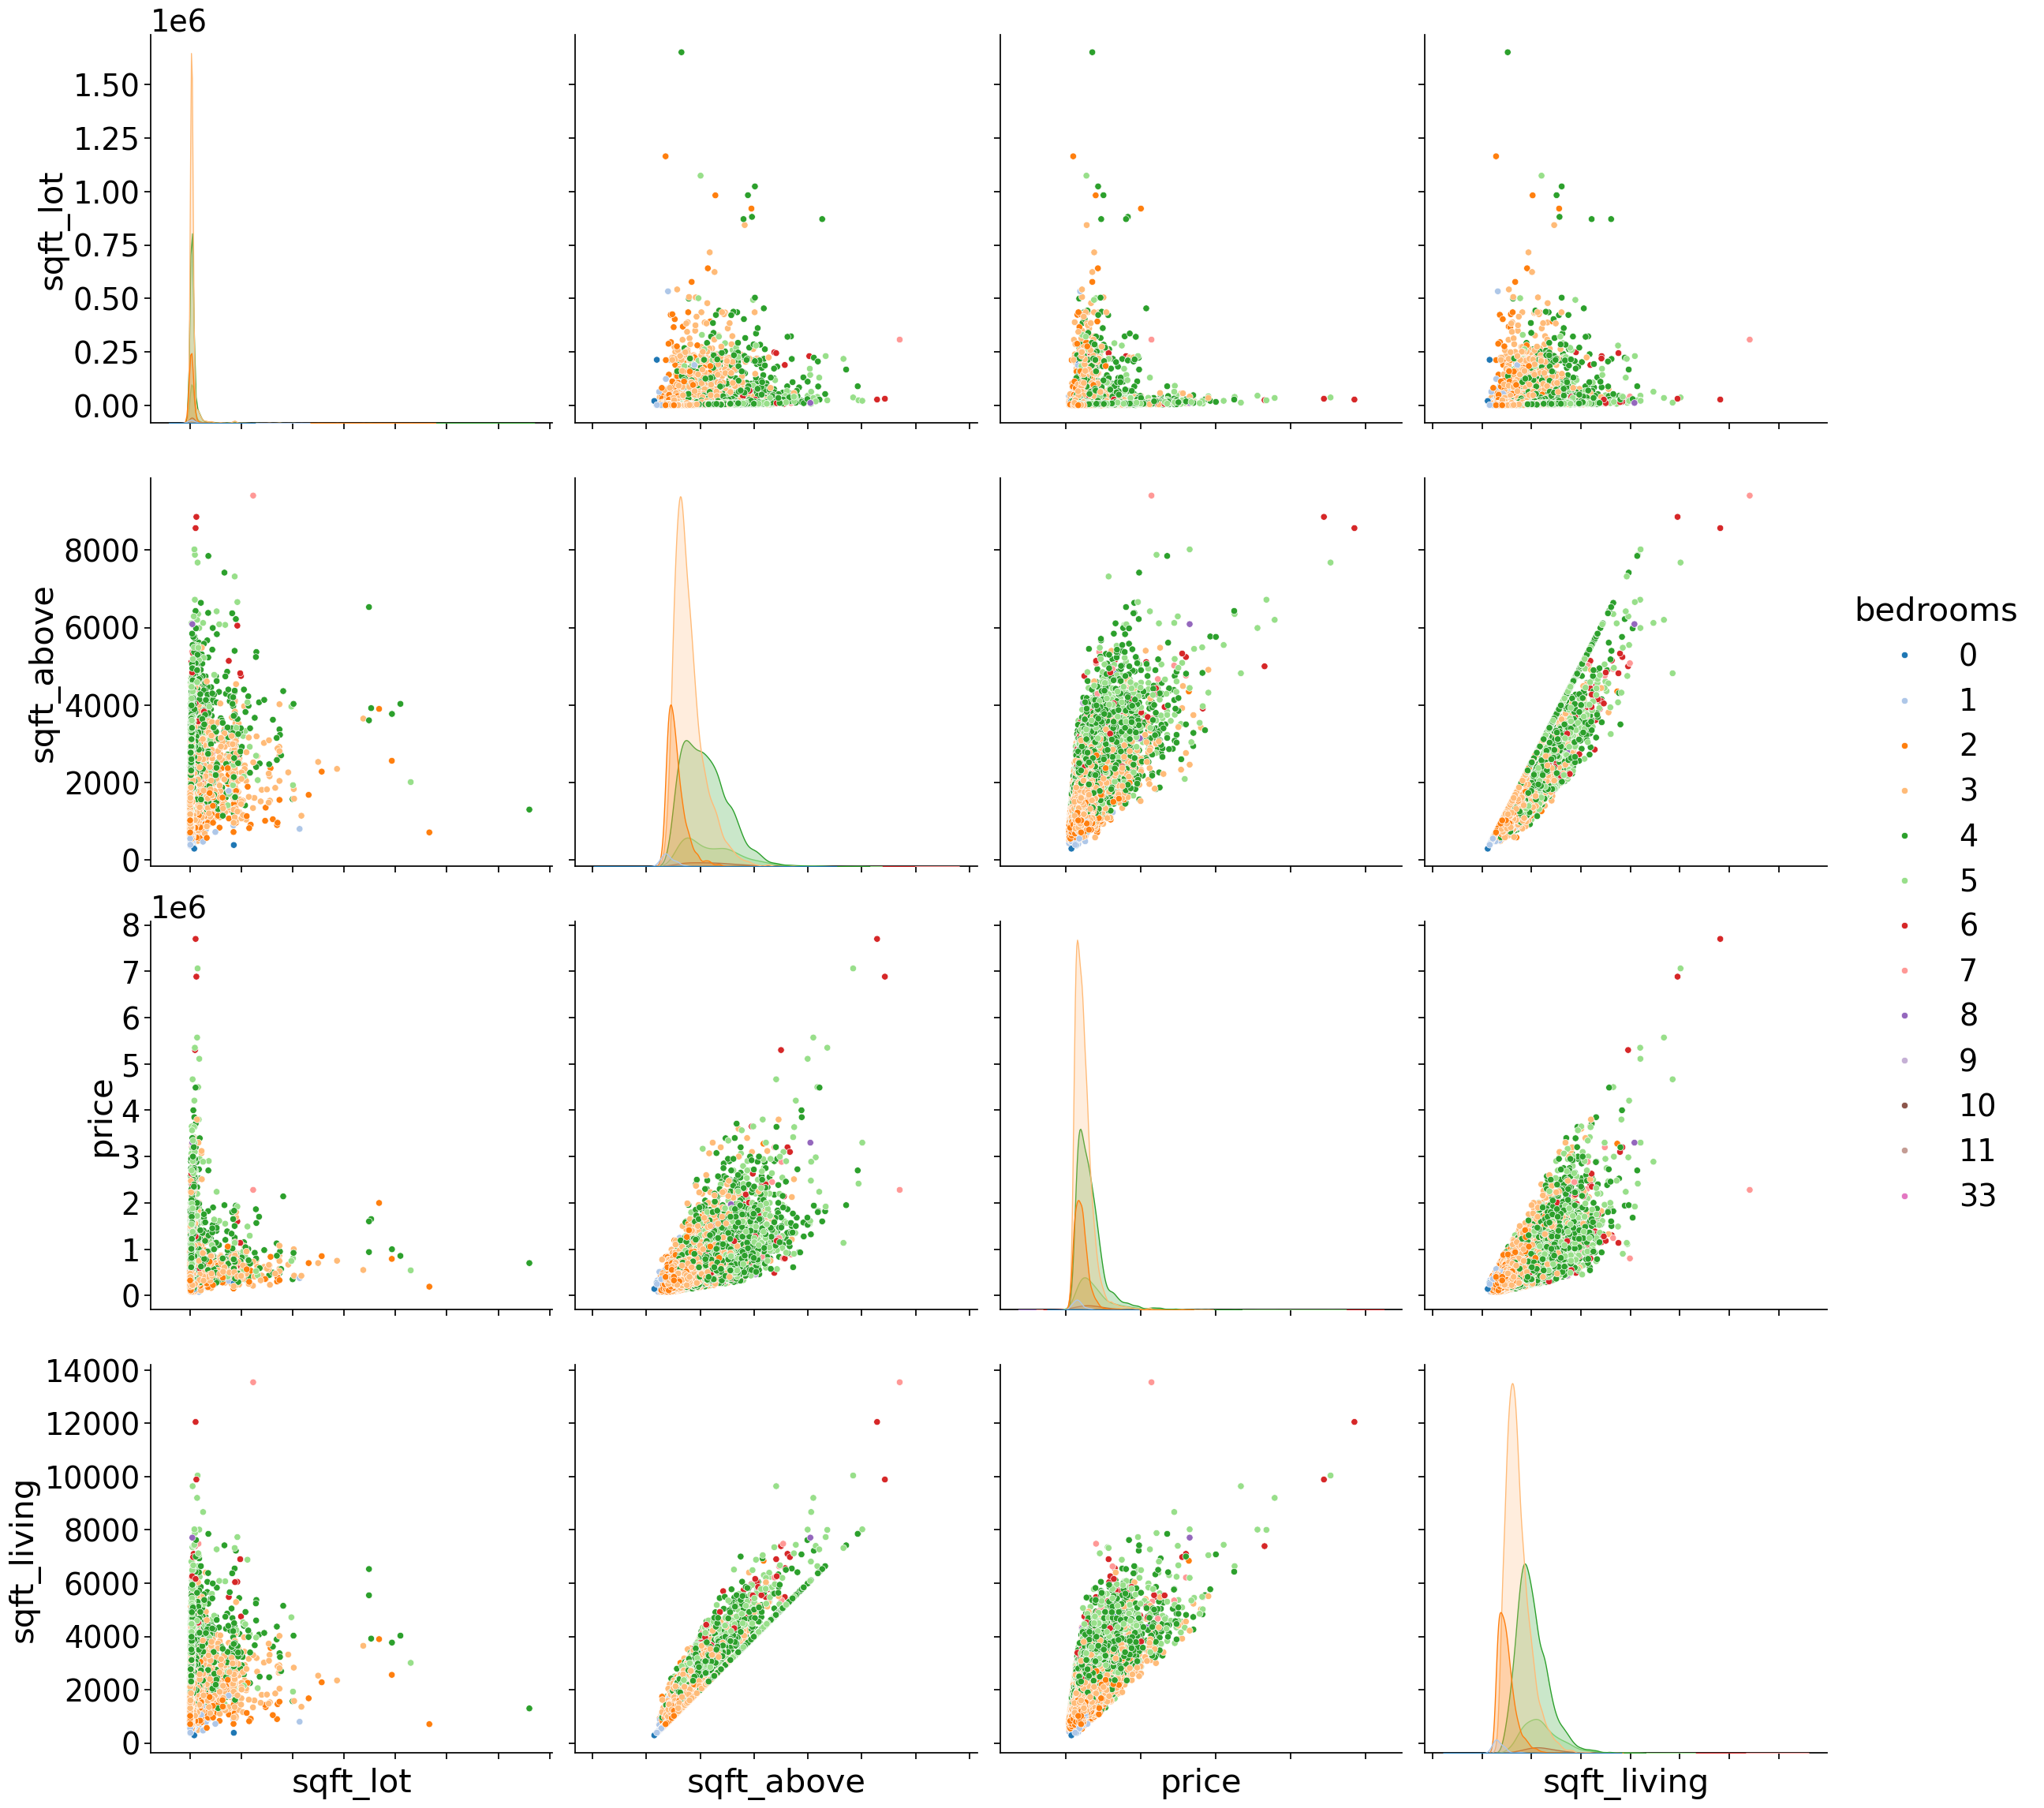

In [6]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']],hue='bedrooms', palette='tab20',height=6)
g.set(xticklabels=[])
plt.show()

In [7]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

In [9]:
import statsmodels.api as sm
x_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17]]
regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):                        0.00
Time:                        15:11:36   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.551e+04   1888.716    -18.802      0.000   -3.92e+04   -3.18e+04
x2          4.105e+04   3253.759     12.618      0.000    3.47e+04    4.74e+04
x3           110.2642      2.268     48.607      0.000     105.818     114.711
x4             0.1334      0.048      2.786      0.005       0.040       0.227
x5          5261.5471   3541.347      1.486      0.137   -1679.755    1.22e+04
x6          5.833e+05   1.74e+04     33.598      0.000    5.49e+05    6.17e+05
x7          5.236e+04   2128.298     24.600      0.000    4.82e+04    5.65e+04
x8          2.721e+04   2323.818     11.709      0.000    2.27e+04    3.18e+04
x9          9.548e+04   2145.492     44.503      0.000    9.13e+04    9.97e+04
x10           71.3928      2.238     31.902      0.000      67.006      75.779
x11           38.8714      2.624     14.813      0.000      33.728      44.015
x12        -2561.7953     68.006    -37.670      0.000   -2695.092   -2428.498
x13           20.4187      3.646      5.600      0.000      13.272      27.566
x14         -519.0756     17.826    -29.119      0.000    -554.016    -484.136
x15         6.022e+05   1.07e+04     56.106      0.000    5.81e+05    6.23e+05
x16        -2.179e+05   1.31e+04    -16.683      0.000   -2.44e+05   -1.92e+05
x17           23.0994      3.392      6.811      0.000      16.452      29.747
x18           -0.3761      0.073     -5.137      0.000      -0.520      -0.233
==============================================================================
Omnibus:                    18403.146   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1873534.498
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      48.049   Cond. No.                     2.98e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.46e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
import statsmodels.api as sm
x_opt = X[:, [0, 1, 2, 3,5,6,7,8,9,10,11,12,13,14,15,16,17]]
regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.287e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):                        0.00
Time:                        15:11:36   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21597   BIC:                                  5.894e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.562e+04   1887.390    -18.872      0.000   -3.93e+04   -3.19e+04
x2          4.234e+04   3136.467     13.500      0.000    3.62e+04    4.85e+04
x3           109.9055      2.256     48.724      0.000     105.484     114.327
x4             0.1312      0.048      2.742      0.006       0.037       0.225
x5          5.833e+05   1.74e+04     33.600      0.000    5.49e+05    6.17e+05
x6          5.249e+04   2126.373     24.686      0.000    4.83e+04    5.67e+04
x7          2.691e+04   2315.359     11.624      0.000    2.24e+04    3.15e+04
x8          9.581e+04   2133.801     44.903      0.000    9.16e+04       1e+05
x9            72.5890      2.088     34.763      0.000      68.496      76.682
x10           37.3165      2.407     15.506      0.000      32.599      42.033
x11        -2544.6464     67.021    -37.968      0.000   -2676.013   -2413.280
x12           20.6412      3.643      5.666      0.000      13.500      27.782
x13         -521.7152     17.738    -29.413      0.000    -556.482    -486.948
x14         6.036e+05   1.07e+04     56.456      0.000    5.83e+05    6.25e+05
x15        -2.192e+05    1.3e+04    -16.824      0.000   -2.45e+05   -1.94e+05
x16           22.3571      3.355      6.664      0.000      15.782      28.932
x17           -0.3807      0.073     -5.204      0.000      -0.524      -0.237
==============================================================================
Omnibus:                    18359.519   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1857062.968
Skew:                           3.560   Prob(JB):                         0.00
Kurtosis:                      47.850   Cond. No.                     2.97e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.49e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
import pickle
filename = 'HouseDataModel.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)